# Modelo predictivo de factores relacionados para el reingreso de pacientes al area hospitalaria
- La finalidad del proyecto es conocer los factores que impactan directamente a la probabilidad de que un paciente reingrese al area hospitalaria una vez que este mismo fue dado de alta.

### 1. Carga y lectura de datos
- El data set que utilizare viene directamente de kaggle en el cual presenta las siguientes caracteristicas (features)
#### Features:
- encounter_ID (ID del encuentro)
- patient_nbr = (Número de paciente)
- race = (Raza)
- gender = (Género)
- age = (Edad)
- weight = (Peso)
- admission_type_id = (Tipo de admisión)
- discharge_disposition_id = (Destino al alta)
- admission_source_id = (Fuente de admisión)
- time_in_hospital = (Tiempo en hospital)
- payer_code = (Código de pagador)
- medical_specialty = (Especialidad médica)
- num_lab_procedures = (Número de procedimientos de laboratorio)
- num_procedures = (Número de procedimientos)
- num_medications = (Número de medicamentos)
- number_outpatient = (Número de visitas ambulatorias)
- number_emergency = (Número de visitas de emergencia)
- number_inpatient = (Número de visitas hospitalarias)
- diag_1 = (Diagnóstico 1)
- diag_2 = (Diagnóstico 2)
- diag_3 = (Diagnóstico 3)
- number_diagnoses = (Número de diagnósticos)
- max_glu_serum = (Resultado de prueba de glucosa en suero)
- A1Cresult = (Resultado de prueba A1c)
- change= (Cambio de medicamentos)
- diabetesMed = (Medicamentos para diabetes)

- 24 features for medications (24 características para medicamentos):

Específicamente: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, y metformin-pioglitazone.
- readmitted = Variable objetivo:
- - NO: Si el paciente no fue readmitdo
- - >30: Si el paciente fue readmitido despues de 30 dias.
- - < 30: Si el paciente fue readmitido en menos de 30 dias. Clasificaria como 'SI'

In [39]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brandao/diabetes")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\asjer\.cache\kagglehub\datasets\brandao\diabetes\versions\1


In [40]:
import pandas as pd

data = pd.read_csv('../data/raw/diabetic_data.csv')

data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [41]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [42]:
data['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

### Limpieza de datos

In [43]:
# Primero eliminaré las filas identificatorias, en este caso son las siguientes: encounter_id, patient_nbr

import numpy as np
data.drop(['patient_nbr', 'encounter_id'], axis=1, inplace=True)
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [44]:
# Ahora detecto que el data set tiene nulos en forma de ' ? ', creare un arreglo para eliminarlos, ya que son nulos
data.isnull().sum()

race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [45]:
import numpy as np

data.replace('?', np.nan, inplace=True)
print("Total de valores nulos: ")
data.isnull().sum()

Total de valores nulos: 


race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

Antes de eliminar los valores nulos, primero analizare su importancia para valorar su respectivo manejo.
Primero analizaré las columnas con más nulos:
- **weight (Peso) :** Contiene 98569 esto es mas del 90% de sus valores totales, es decir el total de filas (pacientes) es de 101,7666, por lo que procedere a eliminar la columna directamente, ya que un porcentaje tan alto no es posible rellenar valores, esto nos daria mas ruido.
- **payer_code (Codigo de pagador):** Contiene 40256 valores nulos, debido a la naturaleza de la variable el codigo de pagador no es relevante para predecir la readmisión, aparte considerando sus valores nulos no nos servira para entrenar el modelo, procedere a elimianarla.
- **medical_specialty (Especialidad médica):** Contiene 49949 valores nulos, lo cual representa cerca del 50% de los valores totales de filas, esta variable podria llegar a ser relevante, pero debido a su cantidad de nulos intentar rellenar nos generaria resultados alterados a nuestro modelo, por lo que procederé a eliminarla.
- **max_glu_serum (Resultado de prueba de glucosa en suero):** Contiene 96420 valores nulos aproximadamente 94% de su valor total por lo que intentar rellenar no generaria datos veridicos, por lo que procederé a eliminarla, como observación podria llegar a ser relevante si tuviera almenos el 80% de valores completos.
- **A1Cresult (Resultado de prueba A1c)** = Contiene 84748 valores nulos aproximadamente 88% de su valor total, debido a su alto porcentaje de valores faltantes la eliminaré.
- **race, diag_1, diag_2, diag_3**: Tienen porcentajes de nulos muy bajos (entre 0.02% y 2.2%). Estos sí podemos manejarlos. Dado que son categóricos, la estrategia más simple y segura es eliminar las filas que contienen estos nulos. Es un porcentaje tan pequeño del total de 101k filas que no afectará nuestro análisis.


In [46]:
# Elimino las columnas que poseen la mayor cantidad de nulos.
data.drop(['weight', 'payer_code', 'medical_specialty', 'max_glu_serum','A1Cresult'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101745 non-null  object
 14  diag

In [47]:
# Para las columnas que representaban menos nulos, eliminaré solo las filas que contienen los valores nulos
data.dropna(subset=['race','diag_1','diag_2'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99139 entries, 1 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99139 non-null  object
 1   gender                    99139 non-null  object
 2   age                       99139 non-null  object
 3   admission_type_id         99139 non-null  int64 
 4   discharge_disposition_id  99139 non-null  int64 
 5   admission_source_id       99139 non-null  int64 
 6   time_in_hospital          99139 non-null  int64 
 7   num_lab_procedures        99139 non-null  int64 
 8   num_procedures            99139 non-null  int64 
 9   num_medications           99139 non-null  int64 
 10  number_outpatient         99139 non-null  int64 
 11  number_emergency          99139 non-null  int64 
 12  number_inpatient          99139 non-null  int64 
 13  diag_1                    99139 non-null  object
 14  diag_2                    

- Pasamos de 101,766 filas a 98,053. Perdimos 3,713 filas, lo cual es solo el 3.6% del total. al ser un porcentaje tan pequeño, no es tan relevante.
- Pasamos de 50 a 43 columnas.

- Ahora muestra 98,053 "Non-Null Count" para todas las columnas, y el chequeo final confirma 0 nulos.

**Crear dos datas con y sin diag_3**

In [48]:
data['diag_3']

1         255
2         V27
3         403
4         250
5         250
         ... 
101761    458
101762    787
101763    296
101764    998
101765    787
Name: diag_3, Length: 99139, dtype: object

In [49]:
data.duplicated().sum()

np.int64(0)

El data set no contiene valores duplicados.

### Analisis de variable objetivo
- El objetivo es entender la distrbución de la variable objetivo readdmited

In [50]:
data['readmitted'].value_counts()

readmitted
NO     53071
>30    34931
<30    11137
Name: count, dtype: int64

C:\Users\asjer\AppData\Local\Temp\ipykernel_13724\3335972655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['readmitted'], color='blue', palette='viridis')


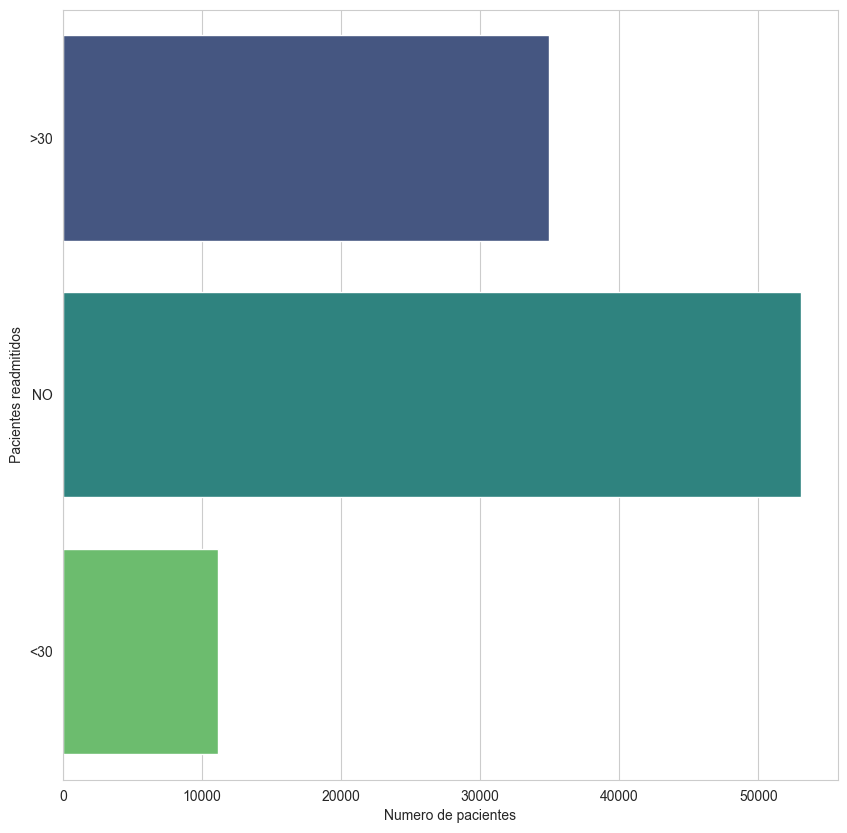

Porcentajes de cada variable: readmitted
NO     53.531910
>30    35.234368
<30    11.233722
Name: proportion, dtype: float64


In [51]:
# Graficaré para tener una representación visual de la distribución.
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid") # Tema para todos los graficos.
plt.figure(figsize=(10,10))
sns.countplot(data['readmitted'], color='blue', palette='viridis')
plt.xlabel('Numero de pacientes')
plt.ylabel('Pacientes readmitidos')
plt.show()

readmitted_norm = data['readmitted'].value_counts(normalize=True)
print(f"Porcentajes de cada variable: {readmitted_norm*100}")

Se puede observar una distribución desbalanceada, con un sesgo hacia los pacientes que no fueron readmitidos.
- mayor 30:  esta variable la manejaremos como pacientes que no fueron readmitidos y representa el 35.3%.
- NO: Pacientes que no fueron readmitidos y representa el 53.3%.
- Menor a 30: Aquellos que fueron readmitidos y representa el 11.2%.

- Para este analisis voy a optar por una clasificacion binaria, simplificando las variables mayor a 30 y NO como pacientes que no fueron readmitido, de esta manera la clase minoritaria es los pacientes que fueron readmitdos.
- De este modo creare una nueva columna llamada target que sera la variable objetivo y la dividire en dos grupos:
- 0: Aquellos que fueron readmitidos (<30 )
- 1: Aquellos que no fueron readmitidos (>30) Dias y (NO)


In [52]:
mapping = {'<30': 1, '>30': 0, 'NO': 0}
data['target'] = data['readmitted'].map(mapping)

data['target'].value_counts()

target
0    88002
1    11137
Name: count, dtype: int64

In [53]:
data.info()
data_diag = data

data_diag.to_csv('../data/processed/data_diag.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 99139 entries, 1 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99139 non-null  object
 1   gender                    99139 non-null  object
 2   age                       99139 non-null  object
 3   admission_type_id         99139 non-null  int64 
 4   discharge_disposition_id  99139 non-null  int64 
 5   admission_source_id       99139 non-null  int64 
 6   time_in_hospital          99139 non-null  int64 
 7   num_lab_procedures        99139 non-null  int64 
 8   num_procedures            99139 non-null  int64 
 9   num_medications           99139 non-null  int64 
 10  number_outpatient         99139 non-null  int64 
 11  number_emergency          99139 non-null  int64 
 12  number_inpatient          99139 non-null  int64 
 13  diag_1                    99139 non-null  object
 14  diag_2                    

In [56]:
data.dropna(subset=['diag_3'], inplace=True)

data.info()

data_sin_diag = data

data_sin_diag.to_csv('../data/processed/data_sin_diag.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 98053 entries, 1 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98053 non-null  object
 1   gender                    98053 non-null  object
 2   age                       98053 non-null  object
 3   admission_type_id         98053 non-null  int64 
 4   discharge_disposition_id  98053 non-null  int64 
 5   admission_source_id       98053 non-null  int64 
 6   time_in_hospital          98053 non-null  int64 
 7   num_lab_procedures        98053 non-null  int64 
 8   num_procedures            98053 non-null  int64 
 9   num_medications           98053 non-null  int64 
 10  number_outpatient         98053 non-null  int64 
 11  number_emergency          98053 non-null  int64 
 12  number_inpatient          98053 non-null  int64 
 13  diag_1                    98053 non-null  object
 14  diag_2                    